### Modelos AR , MA y ARIMA 

Creado por : __Adolfo Huerta__

In [325]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Modelos AR(1)

Un modelo AR (Autorregresivo) es un tipo de modelo utilizado en el análisis de series de tiempo para describir y predecir patrones y tendencias en los datos a lo largo del tiempo. El modelo AR se basa en la idea de que los valores anteriores de la serie de tiempo son útiles para predecir los valores futuros.

En un modelo AR, se asume que el valor actual de la serie de tiempo es una combinación lineal de sus valores anteriores, con un posible término de error. La notación comúnmente utilizada para un modelo AR es AR(p), donde "p" representa el orden del modelo, es decir, la cantidad de valores anteriores utilizados para realizar las predicciones.

La ecuación general de un modelo AR(p) es:

Y(t) = c + φ₁ * Y(t-1) + φ₂ * Y(t-2) + ... + φₚ * Y(t-p) + ε(t)

- Y(t) representa el valor de la serie de tiempo en el momento t.
- c es una constante o término independiente.
- φ₁, φ₂, ..., φₚ son los coeficientes autorregresivos que determinan la influencia de los valores anteriores.
- Y(t-1), Y(t-2), ..., Y(t-p) son los valores anteriores utilizados en el modelo.
- ε(t) es un término de error que representa la parte aleatoria o estocástica del modelo en el momento t.

La elección del orden p depende del análisis de los datos y de la identificación de patrones de autocorrelación en la serie de tiempo. Se pueden utilizar técnicas como la función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF) para determinar el orden adecuado del modelo AR.

El modelo AR es ampliamente utilizado en diversos campos, como la economía, las finanzas, la meteorología y la predicción de series de tiempo en general. Se ha demostrado que es eficaz para modelar y predecir datos que exhiben cierto grado de autocorrelación.

In [326]:
datos = [[1996,	44],[1997,	50],[1998,	55],[1999,	40],[2000,	32],[2001,	34],[2002,	60],[2003,	63],[2004,	64],[2005,	78],[2006,	80],[2007,	88],[2008,	40],[2009,	68],[2010,	63],[2011,	69],[2012,	72],[2013,	75],[2014,	71],[2015,	73],[2016,	63],[2017,	67],[2018,	68]]
# pasar datos a un dataframe
df = pd.DataFrame(datos, columns=['Año', 'Precio abono'])
(df)

,Año,Precio abono
0,1996,44
1,1997,50
2,1998,55
3,1999,40
4,2000,32
5,2001,34
6,2002,60
7,2003,63
8,2004,64
9,2005,78


<Axes: title={'center': 'Precio abono'}, xlabel='Año'>

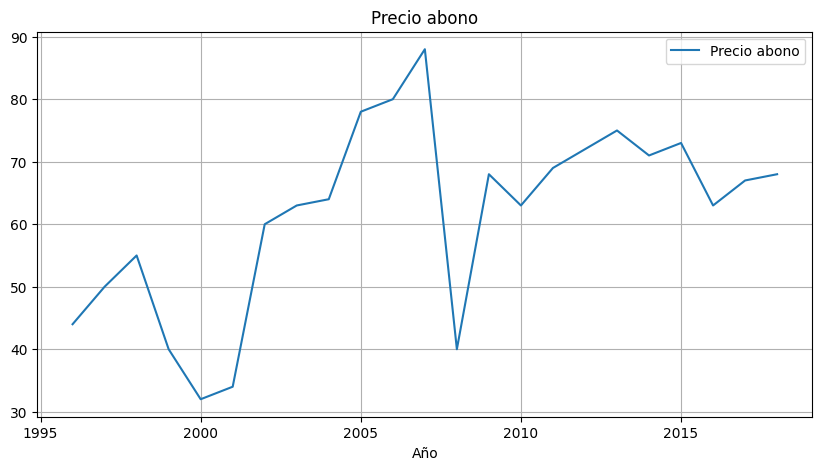

In [327]:
# graficar los datos como una serie de tiempo
df.plot(x='Año', y='Precio abono', figsize=(10,5), grid=True, title='Precio abono')


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

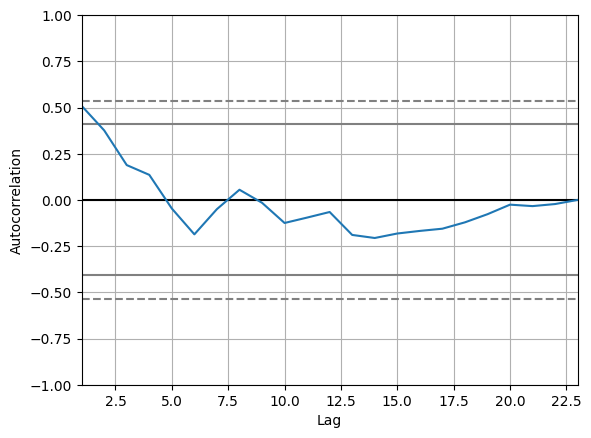

In [328]:
#crear un correlograma para ver si los datos son estacionarios
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Precio abono'])


c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


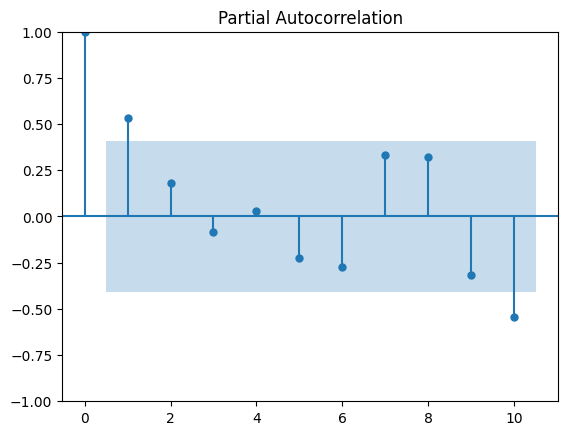

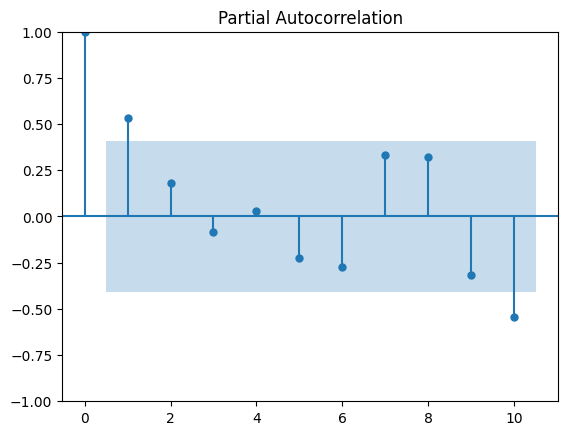

In [329]:
#crear un correlograma parcial para ver si los datos son estacionarios
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Precio abono'], lags=10)


Depende de varios factores el como se general el analisis , en este caso va a ser necesario unicamente un AR(1)

$ Y(t) = c + φ * Y(t-1) + ε(t) $

Donde:

- Y(t) es el valor de la variable en el tiempo t.
- c es una constante o intercepto.
- φ es el coeficiente de autorregresión que indica la dependencia lineal entre el valor actual Y(t) y el valor anterior Y(t-1). Representa la contribución de Y(t-1) en la predicción de Y(t).
- ε(t) es un término de error aleatorio con media cero y varianza constante. Representa el ruido o la parte no explicada por el modelo autorregresivo.
<br>
En resumen, un modelo AR(1) estima el valor actual de una variable en función de su valor anterior, multiplicado por un coeficiente φ, más un término de error aleatorio. 
<br>
El coeficiente φ determina la fuerza y dirección de la dependencia entre los valores consecutivos de la serie de tiempo. Si φ es positivo, indica una correlación positiva, mientras que si es negativo, indica una correlación negativa.
<br>
Es importante destacar que el modelo AR(1) es un caso específico de los modelos autorregresivos de orden superior (AR(p)), donde p representa el número de retardos utilizados en el modelo. Cada modelo AR(p) tiene su propia fórmula y parámetros correspondientes.

Parametro del modelo

In [330]:
def pronostico_AR(valor, constante, coeficiente_AR):
    return constante + coeficiente_AR * valor

#Generar promedio de los datos en una variable
constante = df['Precio abono'].mean()
coeficiente_AR = 0.5

In [331]:
def rellenar_tabla(constante,coeficiente_AR):
   

    #pasar los datos a una lista
    datos = df['Precio abono'].iloc[1:].tolist()
    datosanio = df['Año'].iloc[1:].tolist()
    AR1 = []
    V_medio_error = []
    cuadrado_error = []
    
    for x in datos:
        AR1.append(pronostico_AR(x, constante, coeficiente_AR))
    
    #generar el valor medio promedio de datos menos AR1
    for x in range(0, len(datos)):
        V_medio_error.append(datos[x]- AR1[x])
        cuadrado_error.append((datos[x]- AR1[x])**2)
    #calcular el error cuadratico medio
    ECM = sum(cuadrado_error)/len(datos)
    print("Error cuadratico medio actual " , str(ECM))
    
    #crear un dataframe con los datos de la lista  datos , ar1 , V_medio_error , cuadrado_error , si falta un dato se pone un 0
    return pd.DataFrame({'Año': datosanio, 'Datos': datos, 'AR1': AR1, 'V_medio_error': V_medio_error, 'cuadrado_error': cuadrado_error})

In [332]:
rellenar_tabla(constante,coeficiente_AR)

Error cuadratico medio actual  978.1091467606112


,Año,Datos,AR1,V_medio_error,cuadrado_error
0,1997,50,86.608696,-36.608696,1340.196597
1,1998,55,89.108696,-34.108696,1163.403119
2,1999,40,81.608696,-41.608696,1731.283554
3,2000,32,77.608696,-45.608696,2080.153119
4,2001,34,78.608696,-44.608696,1989.935728
5,2002,60,91.608696,-31.608696,999.109641
6,2003,63,93.108696,-30.108696,906.533554
7,2004,64,93.608696,-29.608696,876.674858
8,2005,78,100.608696,-22.608696,511.153119
9,2006,80,101.608696,-21.608696,466.935728


In [333]:
def ar1_residuals(params, y):
    c, phi = params
    y_pred = [y[0]]

    for t in range(1, len(y)):
        y_pred_t = c + phi * y[t-1]
        y_pred.append(y_pred_t)

    residuals = np.array(y_pred) - np.array(y)
    SSR = np.sum(residuals**2)

    return SSR

# Serie de tiempo 
y = df['Precio abono'].iloc[1:].tolist()

# Función objetivo para minimizar (suma de cuadrados de los residuos)
objective = lambda params: ar1_residuals(params, y)

# Valores iniciales para la constante y el coeficiente autorregresivo
initial_guess = [0, 0]

# Minimización de la función objetivo
result = minimize(objective, initial_guess)

# Valores óptimos de la constante y el coeficiente autorregresivo
c_opt, phi_opt = result.x

print("Valor óptimo de la constante:", c_opt)
print("Valor óptimo del coeficiente autorregresivo:", phi_opt)


Valor óptimo de la constante: 31.879379562149232
Valor óptimo del coeficiente autorregresivo: 0.5007915815653854


In [334]:

rellenar_tabla(c_opt,phi_opt)

Error cuadratico medio actual  54.05142830071117


,Año,Datos,AR1,V_medio_error,cuadrado_error
0,1997,50,56.918959,-6.918959,47.871989
1,1998,55,59.422917,-4.422917,19.562191
2,1999,40,51.911043,-11.911043,141.872941
3,2000,32,47.904710,-15.904710,252.959806
4,2001,34,48.906293,-14.906293,222.197581
5,2002,60,61.926874,-1.926874,3.712845
6,2003,63,63.429249,-0.429249,0.184255
7,2004,64,63.930041,0.069959,0.004894
8,2005,78,70.941123,7.058877,49.827746
9,2006,80,71.942706,8.057294,64.919985


In [335]:
pronostico_AR(65.933207, c_opt, phi_opt)

64.89817457335717

In [336]:
def predicciones ( valor_inicial , c_opt, phi_opt ,iteraciones= 5):
    valor = valor_inicial
    almacen = []
    for _ in range (iteraciones):
        valor = pronostico_AR(valor, c_opt, phi_opt)
        almacen.append(valor)
    return almacen

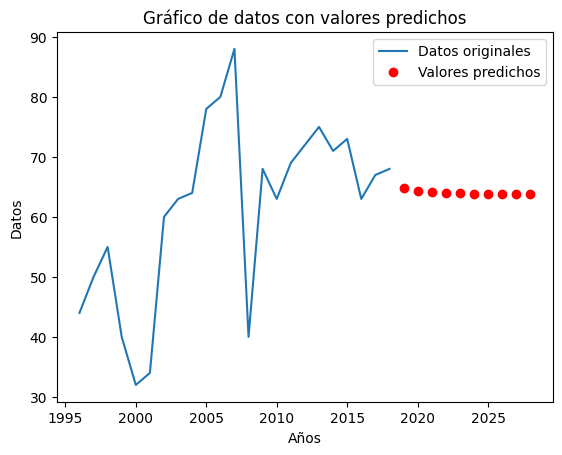

In [337]:
import matplotlib.pyplot as plt

nuevos_datos = [[año, dato] for año, dato in zip(range(2019, 2029), predicciones(65.933207, c_opt, phi_opt, 10))]

# Separar años y datos de la lista original y los nuevos datos
años_originales, datos_originales = zip(*datos)
nuevos_años, nuevos_datos = zip(*nuevos_datos)

# Crear una figura y ejes
fig, ax = plt.subplots()

# Graficar los datos originales
ax.plot(años_originales, datos_originales, label='Datos originales')

# Graficar los nuevos datos como valores predichos
ax.plot(nuevos_años, nuevos_datos, 'ro', label='Valores predichos')

# Configurar etiquetas y título
ax.set_xlabel('Años')
ax.set_ylabel('Datos')
ax.set_title('Gráfico de datos con valores predichos')

# Mostrar una leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

-------------------

In [338]:
import numpy as np

# Datos de ejemplo
datos =  df['Precio abono']

# Orden del modelo AR
orden = 1

# Estimación de los coeficientes
X = np.array([datos[i:i+orden] for i in range(len(datos)-orden)])
y = np.array(datos[orden:])
coeficientes = np.linalg.lstsq(X, y, rcond=None)[0]

# Realizar predicciones
predicciones = []
for i in range(orden, len(datos)):
    valor_predicho = np.dot(coeficientes, datos[i-orden:i])
    predicciones.append(valor_predicho)

print("Coeficientes:", coeficientes)
print("Predicciones:", predicciones)


Coeficientes: [0.98905671]
Predicciones: [43.518495297805664, 49.452835565688254, 54.39811912225708, 39.562268452550605, 31.64981476204048, 33.627928184668015, 59.3434026788259, 62.3105728127672, 63.29962952408096, 77.14642348247368, 79.12453690510121, 87.03699059561133, 39.562268452550605, 67.25585636933603, 62.3105728127672, 68.2449130806498, 71.21208321459109, 74.17925334853238, 70.22302650327732, 72.20113992590485, 62.3105728127672, 66.26679965802226]


In [339]:
#imprimir predicciones y datos en un df
df = pd.DataFrame({'Datos': datos[orden:], 'Predicciones': predicciones})
print(df)

    Datos  Predicciones
1      50     43.518495
2      55     49.452836
3      40     54.398119
4      32     39.562268
5      34     31.649815
6      60     33.627928
7      63     59.343403
8      64     62.310573
9      78     63.299630
10     80     77.146423
11     88     79.124537
12     40     87.036991
13     68     39.562268
14     63     67.255856
15     69     62.310573
16     72     68.244913
17     75     71.212083
18     71     74.179253
19     73     70.223027
20     63     72.201140
21     67     62.310573
22     68     66.266800


In [340]:
#de df calcular el error medio promedio
def error_medio_promedio(datos, predicciones):
    return np.mean(np.abs((datos - predicciones) / datos)) * 100

print("Error medio promedio:", error_medio_promedio(datos[orden:], predicciones))


Error medio promedio: 17.86585180065587


### Intentemos validarlo ->

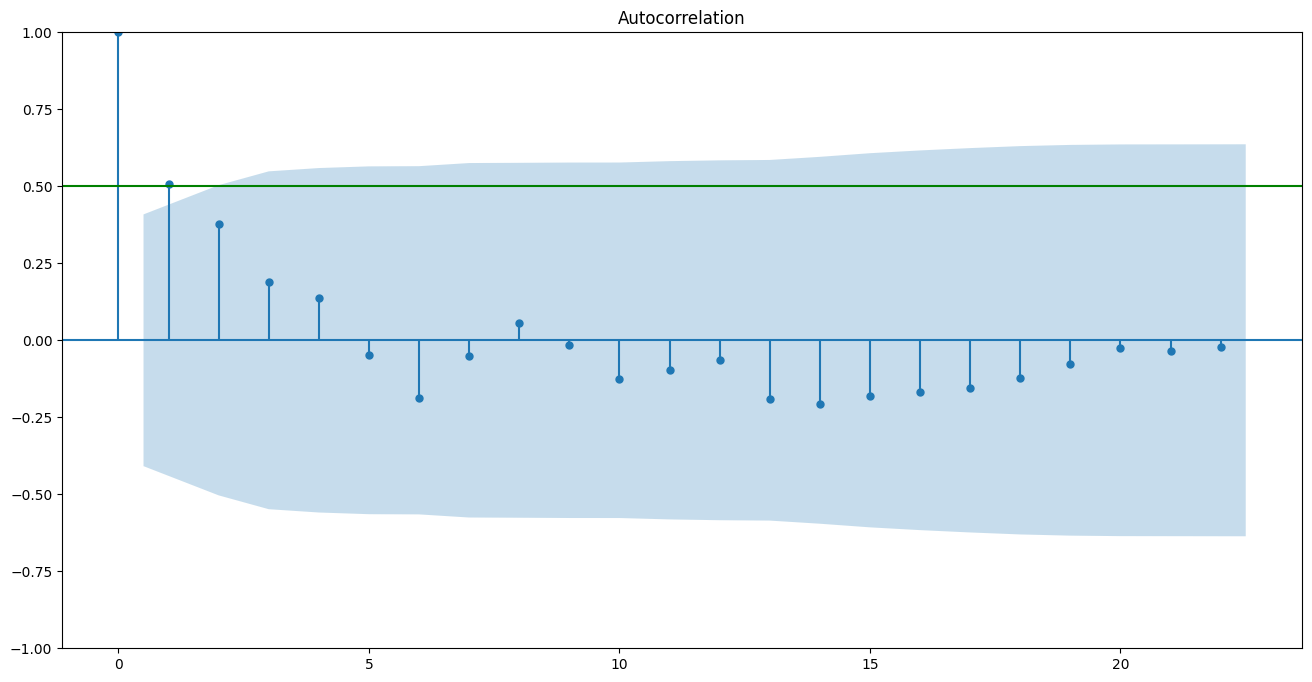

In [341]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
datos = [[1996,	44],[1997,	50],[1998,	55],[1999,	40],[2000,	32],[2001,	34],[2002,	60],[2003,	63],[2004,	64],[2005,	78],[2006,	80],[2007,	88],[2008,	40],[2009,	68],[2010,	63],[2011,	69],[2012,	72],[2013,	75],[2014,	71],[2015,	73],[2016,	63],[2017,	67],[2018,	68]]
# pasar datos a un dataframe
df = pd.DataFrame(datos, columns=['Año', 'Precio abono'])

fig, ax = plt.subplots(figsize=(16,8))
plot_acf(df['Precio abono'], lags=22, ax=ax)
plt.axhline(y=0.5, color="green")
plt.show()

In [342]:
#dividir los datos en entrenamiento y prueba
datos_entrenamiento = df['Precio abono'].iloc[:len(df)-5]
datos_prueba = df['Precio abono'].iloc[len(df)-5:]

In [343]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(datos_entrenamiento, lags=4).fit()

In [344]:
forecasts = model.forecast(5).tolist()
test_values = datos_prueba.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)

70.09500477619576 71 -0.9049952238042351
68.55181390835561 73 -4.448186091644388
66.87145297720757 63 3.871452977207568
67.11975559884287 67 0.11975559884287179
66.71450978608014 68 -1.2854902139198572


In [345]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_values, forecasts))

7.452070101854867


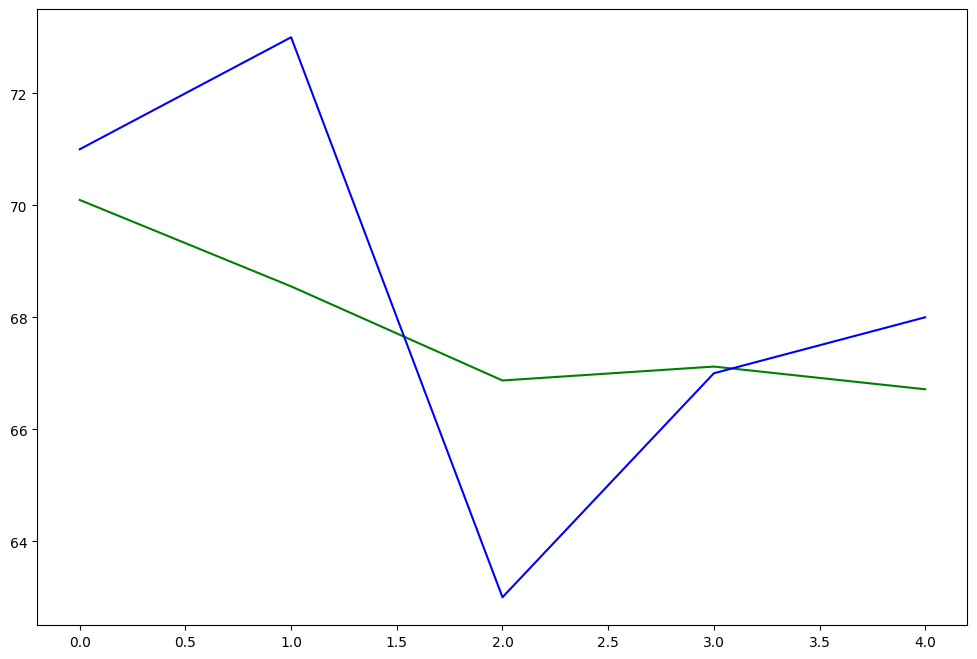

In [346]:
fig = plt.subplots(figsize=(12,8))
plt.plot(forecasts, color="green")
plt.plot(test_values,color="blue")

plt.show()

Coeficientes: [0.98905671]
MSE: 208.97702013005517
R^2: 0.041504212194834245


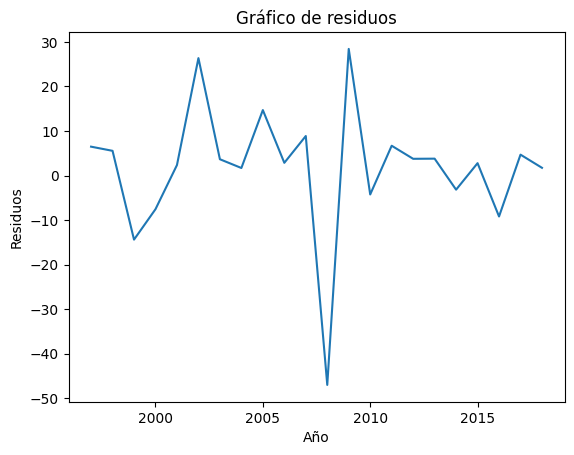

    Año  Predicción
0  2018   67.255856
1  2019   66.519856
2  2020   65.791910
3  2021   65.071930
4  2022   64.359829
Predicciones futuras:
     Año  Predicción
0  2018   67.255856
1  2019   66.519856
2  2020   65.791910
3  2021   65.071930
4  2022   64.359829
MAE: 3.716887606954214


In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
# Datos de ejemplo
datos = [[1996, 44], [1997, 50], [1998, 55], [1999, 40], [2000, 32], [2001, 34], [2002, 60], [2003, 63], [2004, 64], [2005, 78], [2006, 80], [2007, 88], [2008, 40], [2009, 68], [2010, 63], [2011, 69], [2012, 72], [2013, 75], [2014, 71], [2015, 73], [2016, 63], [2017, 67], [2018, 68]]

# Convertir datos a DataFrame de pandas
df = pd.DataFrame(datos, columns=['Año', 'Precio abono'])

# Serie de tiempo
serie_tiempo = df['Precio abono']

# Orden del modelo AR
orden_ar = 1

# Estimación de coeficientes
X = np.array([serie_tiempo[i:i+orden_ar] for i in range(len(serie_tiempo)-orden_ar)])
y = np.array(serie_tiempo[orden_ar:])
coeficientes = np.linalg.lstsq(X, y, rcond=None)[0]

# Validación del modelo
predicciones = np.dot(X, coeficientes)
mse = np.mean((predicciones - y) ** 2)
r2 = 1 - np.var(predicciones - y) / np.var(y)

print("Coeficientes:", coeficientes)
print("MSE:", mse)
print("R^2:", r2)

# Cálculo de residuos
residuos = y - predicciones

# Gráfico de residuos
plt.plot(df['Año'][orden_ar:], residuos)
plt.xlabel('Año')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos')
plt.show()

# Predicciones futuras
num_predicciones = 5
ultimos_valores = serie_tiempo[-orden_ar:].values.tolist()
predicciones_futuras = []
años_prediccion = []
for _ in range(num_predicciones):
    valor_predicho = np.dot(coeficientes, ultimos_valores)
    predicciones_futuras.append(valor_predicho)
    últimos_años = df['Año'].values[-orden_ar:]
    próximo_año = últimos_años[-1] + _
    años_prediccion.append(próximo_año)
    ultimos_valores.append(valor_predicho)
    ultimos_valores = ultimos_valores[-orden_ar:]

# Mostrar predicciones con sus respectivos años
predicciones_df = pd.DataFrame({'Año': años_prediccion, 'Predicción': predicciones_futuras})
print(predicciones_df)

# Calcular el MAE
predicciones_obtenidas = serie_tiempo[-num_predicciones:].values
mae = mean_absolute_error(predicciones_obtenidas, predicciones_futuras)

# Mostrar predicciones con sus respectivos años
predicciones_df = pd.DataFrame({'Año': años_prediccion, 'Predicción': predicciones_futuras})
print("Predicciones futuras:\n", predicciones_df)
print("MAE:", mae)

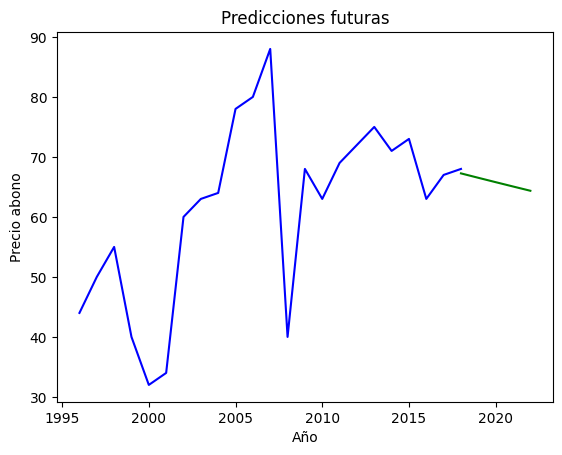

In [349]:
#graficar predicciones y datos
plt.plot(df['Año'], df['Precio abono'], color="blue")
plt.plot(predicciones_df['Año'], predicciones_df['Predicción'], color="green")
plt.xlabel('Año')
plt.ylabel('Precio abono')
plt.title('Predicciones futuras')
plt.show()


El método Box-Jenkins, es un enfoque ampliamente utilizado para el análisis y la predicción de series de tiempo. Fue desarrollado por George Box y Gwilym Jenkins en la década de 1970 y se ha convertido en un marco de referencia importante en el campo de la econometría y el análisis de series de tiempo.
<br>
La metodología Bo Jenkins se basa en el modelo ARIMA (AutoRegressive Integrated Moving Average), que combina los componentes autorregresivos (AR), de media móvil (MA) e integrados (I) para modelar y predecir series de tiempo.
<br>
El enfoque de la metodología Bo Jenkins sigue estos pasos generales:

- Identificación del modelo: En esta etapa, se analiza la serie de tiempo para identificar la presencia de tendencias, estacionalidad y autocorrelación. Se utilizan herramientas como gráficos de autocorrelación (ACF) y autocorrelación parcial (PACF) para ayudar en la identificación del modelo ARIMA adecuado.

- Estimación de parámetros: Una vez que se ha identificado el modelo ARIMA apropiado, se estiman los parámetros del modelo utilizando técnicas como la estimación de máxima verosimilitud (MLE) o mínimos cuadrados.

- Diagnóstico del modelo: Después de la estimación de los parámetros, se realiza un diagnóstico del modelo para evaluar la bondad de ajuste. Se examinan los residuos para verificar si cumplen con las suposiciones del modelo ARIMA y si son ruido blanco.

- Validación del modelo: En esta etapa, se utiliza el modelo ARIMA estimado para realizar predicciones en un conjunto de datos de validación. Se evalúa el rendimiento del modelo utilizando medidas de error como el error cuadrático medio (MSE) o el error absoluto medio (MAE).

- Refinamiento del modelo: Si el modelo no proporciona resultados satisfactorios, se pueden realizar ajustes y refinamientos, como modificar el orden de los componentes ARIMA o incorporar factores adicionales en el modelo.

<br>
La metodología Bo Jenkins se ha utilizado con éxito en diversas aplicaciones de pronóstico y análisis de series de tiempo en campos como la economía, las finanzas, la meteorología y la demanda de productos.
<br>
Es importante destacar que la implementación práctica de la metodología Bo Jenkins requiere conocimientos en análisis de series de tiempo y el uso de herramientas estadísticas y de programación para ajustar y validar los modelos ARIMA.

---

En primer lugar, utilizaremos la Regresión Lineal de SciKitLearn. Esto se debe a que hemos establecido que este modelo es solo una regresión lineal elegante y SKLearn es mucho más rápido y más estable numéricamente que cualquier cosa que podamos escribir nosotros mismos.

Ahora tenemos que decidir qué variables se almacenarán en nuestra clase. Para este modelo en particular solo necesitamos 3 cosas: una variable p para almacenar el orden del modelo de regresión automática, un modelo de variable para almacenar el modelo de regresión lineal que funciona detrás de escena y un sigma variable para usar en la generación de ruido más adelante. Todo esto se puede resumir en esta función __init__

In [ ]:
#import linear regression model
from sklearn.linear_model import LinearRegression
class AR:
    def __init__(self, p):
        self.p = p
        self.model = LinearRegression()
        self.sigma = None

Ahora necesitamos generar realmente los datos sobre los cuales se entrenará el modelo de regresión lineal subyacente.

Esto es, cuando se despoja de su núcleo, un modelo de regresión lineal. Sin embargo, los datos en los que se entrena deben diseñarse a partir de una serie de tiempo dada como una matriz 1-D. Para esto, escribiremos una función separada

In [ ]:
  def generate_train_x(self, X):
      n = len(X)
      
      # Storing values X_1 through X_(n-p) in a column
      ans = X[:n-self.p]
      ans = np.reshape(ans, (-1, 1))
      
      for k in range(1, self.p):
        # Analogous to what was done earlier, but for an intermediate column
        temp = X[k:n-self.p+k]
        temp = np.reshape(temp, (-1, 1))
        
        # Stiacking them next to each other
        ans = np.hstack((ans, temp))
        
      return ans

En esta función primero hacemos la columna inicial de la ecuación anterior (la forma matricial del modelo AR). Después, simplemente apilamos las siguientes columnas junto a esta.

Esto se hizo a través de columnas porque el orden del modelo AR generalmente será menor que la cantidad de datos introducidos en él, por lo que procesar más datos a través de numpy es significativamente más rápido.

Se realiza un proceso análogo para la variable objetivo

In [ ]:
    def generate_train_y(self, X):
        return X[self.p:]

Finalmente, esto se ensambla en la función .fit()

In [ ]:
  def fit(self, X):
    self.sigma = np.std(X)
    train_x = self.generate_train_x(X)
    train_y = self.generate_train_y(X)
    self.model.fit(train_x, train_y)

Finalmente, estamos en la parte más interesante de este modelo: la función de predicción.

Esta función debe incorporar dos cosas: la capacidad de predecir una cantidad arbitraria de pasos hacia el futuro y la capacidad de realizar una simulación de Monte Carlo en sus predicciones.

Aquí los parámetros de entrada incluyen num_predictions y mc_depth. Num_predictions es una variable que representa la cantidad de pasos que predeciremos en función de los datos dados. Mc_depth es la cantidad de simulaciones Monte Carlo del modelo que promediaremos.

In [ ]:
  def predict(self, X, num_predictions, mc_depth):
      X = np.array(X)
      ans = np.array([])

      for j in range(mc_depth):
        ans_temp = []
        a = X[-self.p:]

        for i in range(num_predictions):
          next = self.model.predict(np.reshape(a, (1, -1))) + np.random.normal(loc=0, scale=self.sigma)

          ans_temp.append(next)
          
          a = np.roll(a, -1)
          a[-1] = next
        
        if j==0:
          ans = np.array(ans_temp)
        
        else:
          ans += np.array(ans_temp)
      
      ans /= mc_depth

      return ans

La simulación de Monte Carlo es una técnica estadística y computacional utilizada para modelar y analizar sistemas complejos mediante la generación de múltiples muestras aleatorias. Se basa en la generación de valores aleatorios para los parámetros o variables de entrada del sistema y la ejecución repetida de un modelo o algoritmo para evaluar el comportamiento del sistema en función de esas muestras aleatorias.

El nombre "Monte Carlo" proviene del famoso casino de Montecarlo, Mónaco, conocido por sus juegos de azar y la aleatoriedad asociada. La idea de la simulación de Monte Carlo es similar a la experiencia de jugar en un casino, donde los resultados se basan en eventos aleatorios.

En la simulación de Monte Carlo, se siguen los siguientes pasos:

1. Definición del modelo: Se establece un modelo matemático o algoritmo que describe el sistema o fenómeno que se desea estudiar. Esto puede incluir ecuaciones, reglas, suposiciones y relaciones entre variables.

2. Identificación de variables de entrada: Se identifican las variables de entrada del modelo, es decir, los parámetros o factores que pueden variar y afectar el resultado del sistema. Estas variables pueden tener incertidumbre o variabilidad asociada.

3. Generación de muestras aleatorias: Se generan muestras aleatorias para las variables de entrada del modelo. Estas muestras representan diferentes escenarios o valores posibles para las variables, basados en distribuciones de probabilidad conocidas o estimadas.

4. Ejecución del modelo: Se ejecuta el modelo o algoritmo utilizando cada conjunto de muestras aleatorias de las variables de entrada. Esto implica aplicar las ecuaciones y reglas definidas en el modelo para generar un resultado o conjunto de resultados.

5. Análisis de resultados: Se analizan los resultados obtenidos de la ejecución del modelo utilizando las muestras aleatorias. Se pueden calcular estadísticas resumen, como promedios, desviaciones estándar o percentiles, para evaluar el comportamiento del sistema y entender su variabilidad.

La simulación de Monte Carlo es especialmente útil cuando el sistema o fenómeno que se está estudiando es complejo, no se puede modelar de manera analítica exacta o presenta incertidumbre en los datos de entrada. Se utiliza en diversas disciplinas, como la física, las finanzas, la ingeniería, la biología y la economía, entre otras, para comprender mejor los sistemas y tomar decisiones basadas en el análisis de múltiples escenarios aleatorios.